In [124]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.optimize import minimize


## Activity 1

### Plot data sets for N=10, N=100, N=1000

In [125]:
N1 = 10
N2 = 100
N3 = 1000

# Generate x (uniform distribution between 0 and 1)
xvals_N1 = np.linspace(0,1,N1)
xvals_N2 = np.linspace(0,1,N2)
xvals_N3 = np.linspace(0,1,N3)

# Generate function
yvals_N1 = np.sin(2 * np.pi* xvals_N1)
yvals_N2 = np.sin(2 * np.pi* xvals_N2)
yvals_N3 = np.sin(2 * np.pi* xvals_N3)

In [126]:
# Add Gaussian noise
noise1 = np.random.normal(0,0.3,N1)
noise2 = np.random.normal(0,0.3,N2)
noise3 = np.random.normal(0,0.3,N3)

noisy_yvals1 = yvals_N1 + noise1
noisy_yvals2 = yvals_N2 + noise2
noisy_yvals3 = yvals_N3 + noise3


<function matplotlib.pyplot.show(close=None, block=None)>

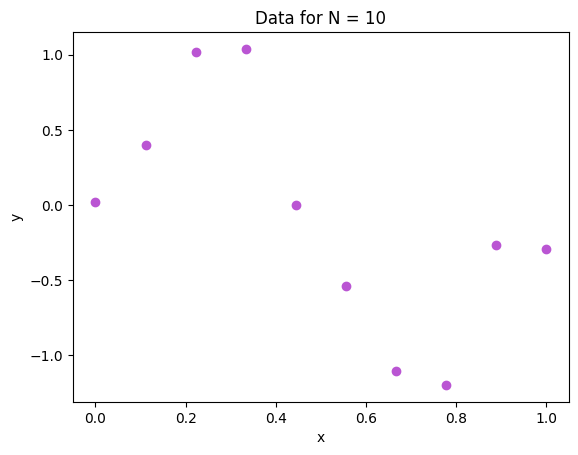

In [127]:
# Plot y vs. x
#plt.scatter(xvals_N1, yvals_N1, label="clean signal", color="hotpink")
plt.scatter(xvals_N1, noisy_yvals1, label="noisy signal", color="mediumorchid")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data for N = 10")
#plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

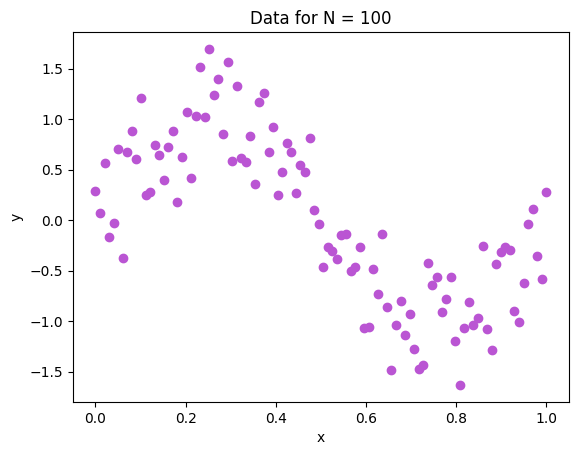

In [128]:
#plt.scatter(xvals_N2, yvals_N2, label="clean signal", color="hotpink")
plt.scatter(xvals_N2, noisy_yvals2, label="noisy signal", color="mediumorchid")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data for N = 100")
#plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

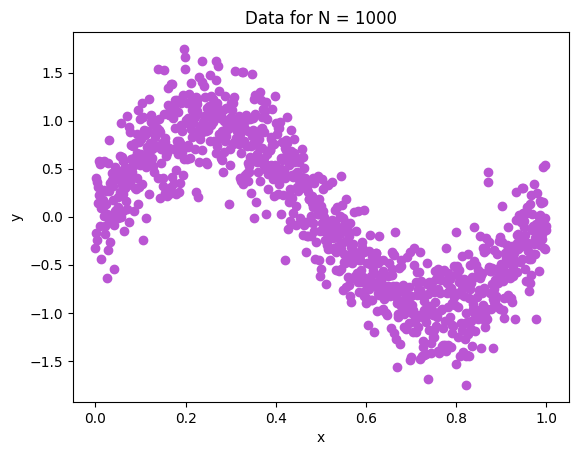

In [129]:
#plt.scatter(xvals_N3, yvals_N3, label="clean signal", color="hotpink")
plt.scatter(xvals_N3, noisy_yvals3, label="noisy signal", color="mediumorchid")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data for N = 1000")
#plt.legend()
plt.show

### Polynomial fit to target data set with polynomials 1-9

In [130]:
def plot_polynomial(x, y):
    x_plot = np.linspace(0, 1, 1000)

    plt.figure()  # create ONE figure

    # plot data once
    plt.scatter(x, y, color="mediumorchid", marker="o", label="data")

    for degree in range(1, 10):
        coefficients = np.polyfit(x, y, degree)

        y_fit = []
        for j in range(len(x_plot)):
            x_iteration = x_plot[j]
            y_fitted = 0
            for i in range(degree + 1):
                y_fitted += coefficients[i] * (x_iteration)**(degree - i)
            y_fit.append(y_fitted)

        plt.plot(x_plot, y_fit, label=f"degree {degree}")

    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Polynomial fits (degrees 1–9)")
    plt.legend()
    plt.show()

#### For N = 10

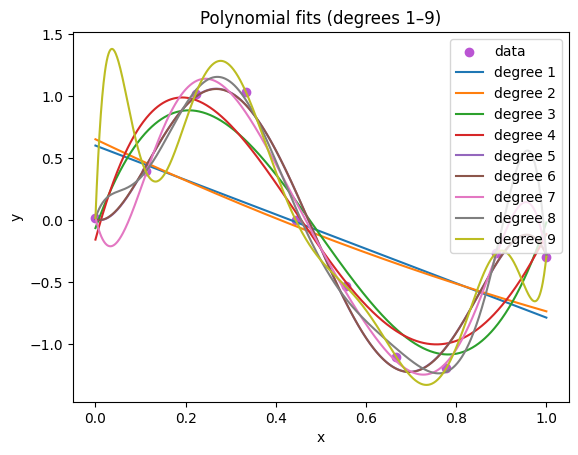

In [131]:
plot_polynomial(xvals_N1, noisy_yvals1)


#### For N = 100

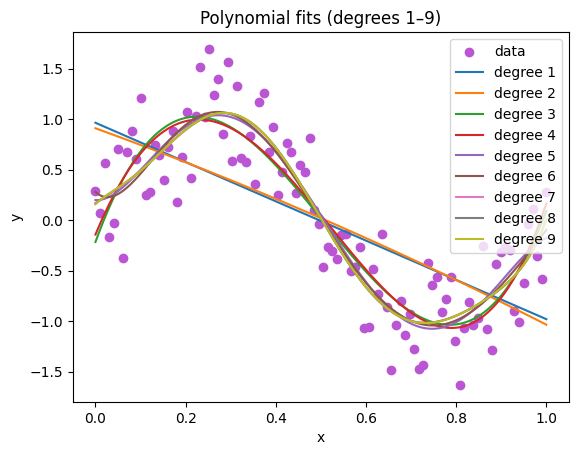

In [132]:
plot_polynomial(xvals_N2, noisy_yvals2)

#### For N = 1000

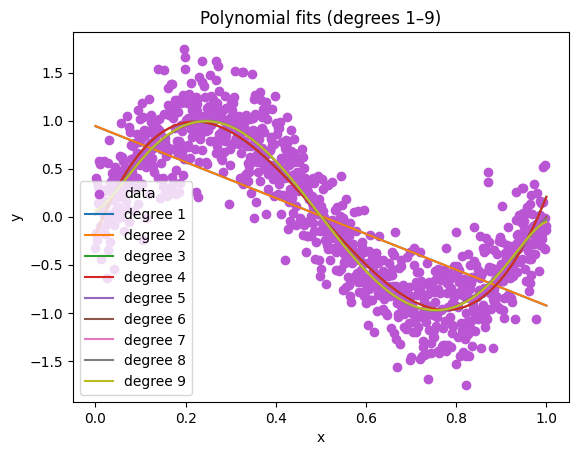

In [133]:
plot_polynomial(xvals_N3, noisy_yvals3)

#### Analysis 1a. Discuss the outcome as you increase the polynomial order and the relationship between the outcome and the number of data points used.
##### As the polynomial order is increased, the model fits the training data more closely. The higher the degree, the higher the model's flexibility to bend and follow the data points. With fewer data points, the higher-order polynomials exhibit overfitting. This is evident by instability near the edges of the interval. For example, the N=10 case shows large oscillations near the boundaries of the data for degrees 8 and 9. As the number of data points increases, these oscillations were suppressed and the high degree polynomials converge towards the true function. 

#### Analysis 1b. For polynomial order n = 9 and number of data points N = 100, compare the noise $\sigma$ of your model with the quantity $E_{RMS} = \sqrt{2E(w*)/N}$.

In [134]:
# Dataset N = 100
x = xvals_N2
t = noisy_yvals2

degree = 9

coeffs = np.polyfit(x, t, degree)
y_fit = np.polyval(coeffs, x)

E = 0.5 * np.sum((t - y_fit)**2)
E_RMS = np.sqrt(2 * E / len(t))

print("E_RMS =", round(E_RMS, 3))

E_RMS = 0.348


##### For a polynomial of order 9 fitted to N = 100 data points, the root-mean-sqaure error was found to be $E_{RMS}$ = 0.304. The noise added to the data had standard deviation $\sigma$ = 0.3. This indicates that the error is about as large as the noise we added.

#### Analysis 1c. For N = 100, divide your sample in training (25%) and test (75%) sets. Plot the root-mean-square errors on the training and test sets for various values of M. 

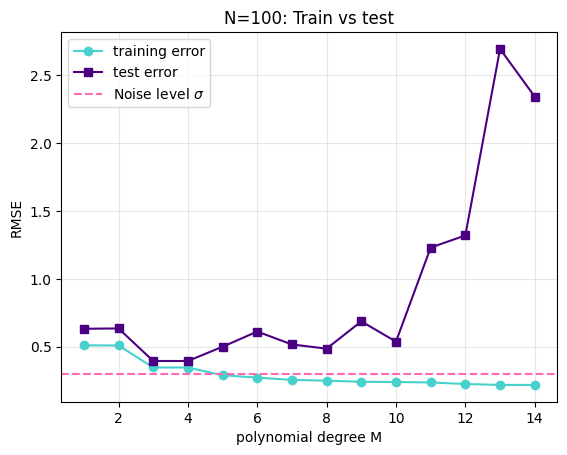

In [135]:
# N=100 data
x, t = xvals_N2, noisy_yvals2

# 25% train, 75% test
rng = np.random.default_rng(0)
idx = rng.permutation(len(x))
ntr = len(x)//4
tr, te = idx[:ntr], idx[ntr:]

# degrees 
Ms = range(1, 15)

# RMS errors
rmse = lambda a, b: np.sqrt(np.mean((a - b)**2))
Etr, Ete = [], []

for M in Ms:
    c = np.polyfit(x[tr], t[tr], M) 
    Etr.append(rmse(np.polyval(c, x[tr]), t[tr]))
    Ete.append(rmse(np.polyval(c, x[te]), t[te]))

# plotting
plt.plot(Ms, Etr, 'o-', color='mediumturquoise', label='training error')
plt.plot(Ms, Ete, 's-', color='indigo', label='test error')
plt.axhline(0.3, color='hotpink', ls='--', label=r'Noise level $\sigma$')
plt.xlabel('polynomial degree M'); plt.ylabel('RMSE')
plt.title('N=100: Train vs test')
plt.legend(); plt.grid(True, alpha=0.3); plt.show()

##### The test error decreases for large M, which indicates overfitting. 

## Activity 2

#### Plots of M = 9 polynomiclas fitted to the datat set using the regularized error function (1.4) for two values of the regularization parameter $\lambda$ corresponding to ln $\lambda$ = -18 and ln $\lambda$ = 0.

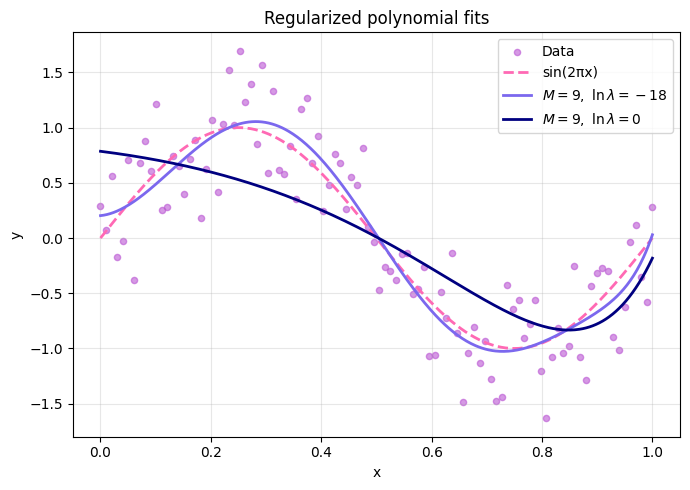

In [136]:
# Dataset 
x = xvals_N2
t = noisy_yvals2

# Degree M = 9
M = 9

def poly_model(x, w):
    y = np.zeros_like(x, dtype=float)
    for j in range(len(w)):
        y += w[j] * (x ** j)
    return y

def E_tilde(w, x, t, lam):
    residuals = poly_model(x, w) - t
    misfit_term = 0.5 * np.sum(residuals**2)
    reg_term  = 0.5 * lam * np.sum(w**2)
    return misfit_term + reg_term

ln_lambdas = [-18, 0]
fits = {}

for ln_lam in ln_lambdas:
    lam = np.exp(ln_lam)

    w0 = np.zeros(M + 1)
    result = minimize(E_tilde, w0, args=(x, t, lam))
    w_hat = result.x

    fits[ln_lam] = w_hat

# Plot
x_fine = np.linspace(0, 1, 500)

plt.figure(figsize=(7, 5))
plt.scatter(x, t, s=20, alpha=0.6, color="mediumorchid", label="Data")
plt.plot(x_fine, np.sin(2*np.pi*x_fine), "--", color="hotpink", lw=2, label="sin(2πx)")

colors = ["mediumslateblue", "navy"]

for (ln_lam, w_hat), color in zip(fits.items(), colors):
    plt.plot(
        x_fine,
        poly_model(x_fine, w_hat),
        lw=2,
        color=color,
        label=fr"$M=9,\ \ln\lambda={ln_lam}$"
    )

plt.xlabel("x")
plt.ylabel("y")
plt.title("Regularized polynomial fits")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


#### Analysis 2a. Describe the underlying reason why fig. 1.7(left) and (right) are so different.

##### $\lambda$ controls the complexity of the model and determines the degree of over-fitting. For the value of ln( $\lambda$ ) = -18, there is a much closer representation of the function sin(2 $\pi$ x). In this case, larger coefficients are allowed. The penalty term that is being added to the error function is very small so the curve stronly follows the data. For the value of ln( $\lambda$ ) = 0, the red curve is nearly a straight line because the data is underfit. Large coefficients are not allowed and most of them are near zero. 

#### Analysis 2b. Reproduce Fig. 1.8 and explain the reasons underlying the worse outcome when $\lambda$ is close to 0 or very high. 


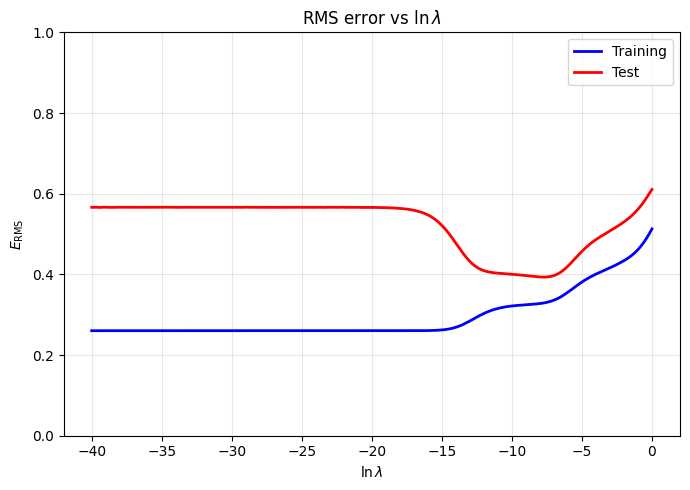

In [137]:
ln_lambdas = np.linspace(-40, 0, 200)

E_rms_train, E_rms_test = [], []

for ln_lam in ln_lambdas:
    lam = np.exp(ln_lam)

    w0 = np.zeros(M + 1)
    w_opt = minimize(E_tilde, w0, args=(x[tr], t[tr], lam)).x

    # RMS on training and test sets
    E_rms_train.append(rmse(poly_model(x[tr], w_opt), t[tr]))
    E_rms_test.append(rmse(poly_model(x[te], w_opt), t[te]))

plt.figure(figsize=(7, 5))
plt.plot(ln_lambdas, E_rms_train, color='blue', lw=2, label="Training")
plt.plot(ln_lambdas, E_rms_test,  color='red', lw=2, label="Test")

plt.xlabel(r"$\ln \lambda$")
plt.ylabel(r"$E_{\mathrm{RMS}}$")
plt.ylim(0, 1)
plt.title("RMS error vs $\ln \lambda$")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

##### At large negative ln( $\lambda$ ) values, there is low training error because there is very little regularization. As $\lambda$ increases, the large coefficients are suppressed so the polynomial becomes smoother. For large $\lambda$, the model becomes overly constrained and underfits the data.